### **Importing Libraries**

In [ ]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import scipy
from scipy.sparse.linalg import eigs
import math

### **Signal Generation**

In [ ]:
piecewise_constant_signal = np.concatenate((np.ones((1,128)),np.ones((1,64))*2, np.ones((1,64))*3),axis=None)

t = np.linspace(0,1,256)
n_cycles = 4

sawtooth_signal = ((t*256)%(256//n_cycles))/64

T = 256/n_cycles
sine_signal = np.sin(2*math.pi*(t*256)/T)

Text(0.5, 1.0, 'Sine Signal')

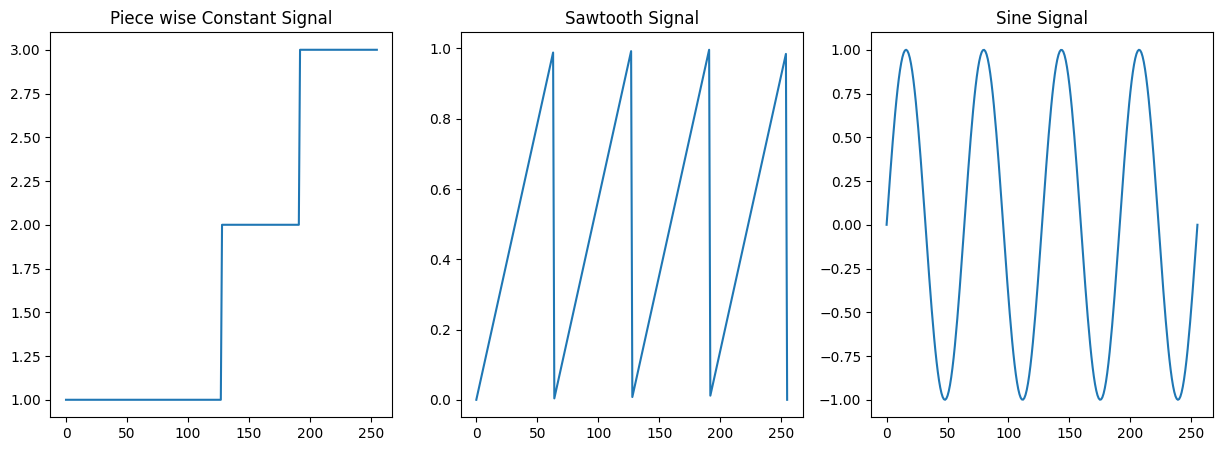

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.plot(piecewise_constant_signal)
plt.title('Piece wise Constant Signal')

plt.subplot(1,3,2)
plt.plot(sawtooth_signal)
plt.title('Sawtooth Signal')

plt.subplot(1,3,3)
plt.plot(sine_signal)
plt.title('Sine Signal')

In [ ]:
sigma_values = [0, 0.5, 1]

std_dev = 0.2

# Piece Wise Constant Noisy Signals
piecewise_constant_noisy_signals = [ piecewise_constant_signal.copy() + sigma * np.random.normal(loc = 0 ,scale = std_dev, size = len(piecewise_constant_signal)) for sigma in sigma_values ]


# Sawtooth Noisy Signals
sawtooth_noisy_signals = [ sawtooth_signal.copy() + sigma * np.random.normal(loc = 0 ,scale = std_dev, size = len(sawtooth_signal)) for sigma in sigma_values ]


# Sine Noisy Signals
sine_noisy_signals = [ sine_signal.copy() + sigma * np.random.normal(loc = 0 ,scale = std_dev, size = len(sine_signal)) for sigma in sigma_values ]


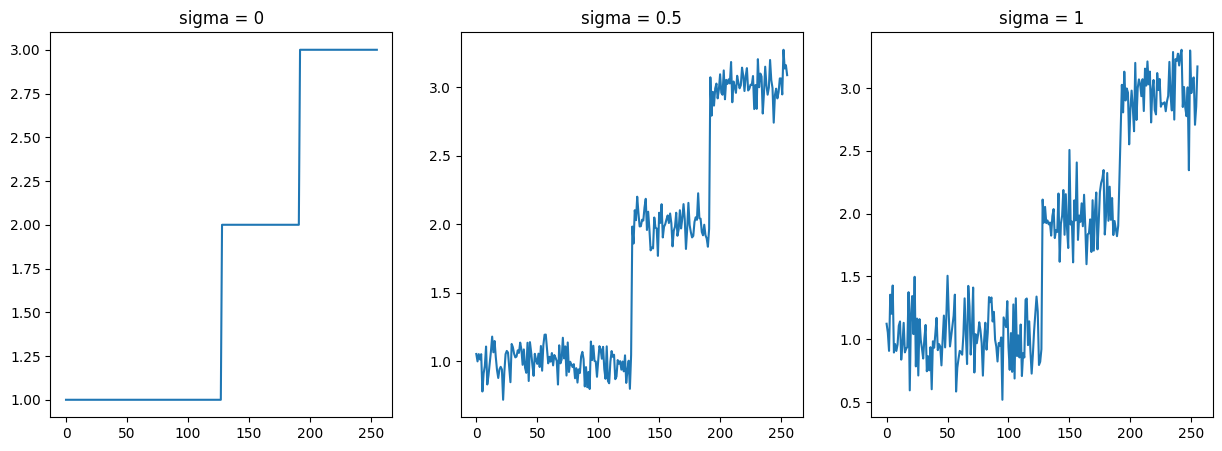

In [ ]:
# Piece wise Constant Noisy Signals

plt.figure(figsize = (15,5))

for i,signal in enumerate(piecewise_constant_noisy_signals):
    plt.subplot(1,3,i+1)
    plt.plot(signal)
    plt.title(f'sigma = {sigma_values[i]}')

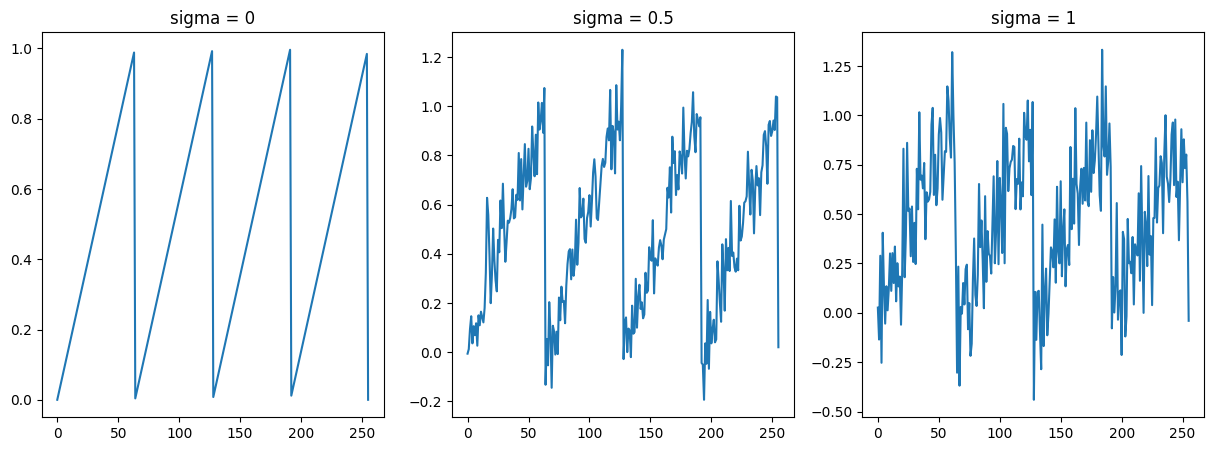

In [ ]:
# Sawtooth Noisy Signals

plt.figure(figsize = (15,5))

for i,signal in enumerate(sawtooth_noisy_signals):
    plt.subplot(1,3,i+1)
    plt.plot(signal)
    plt.title(f'sigma = {sigma_values[i]}')

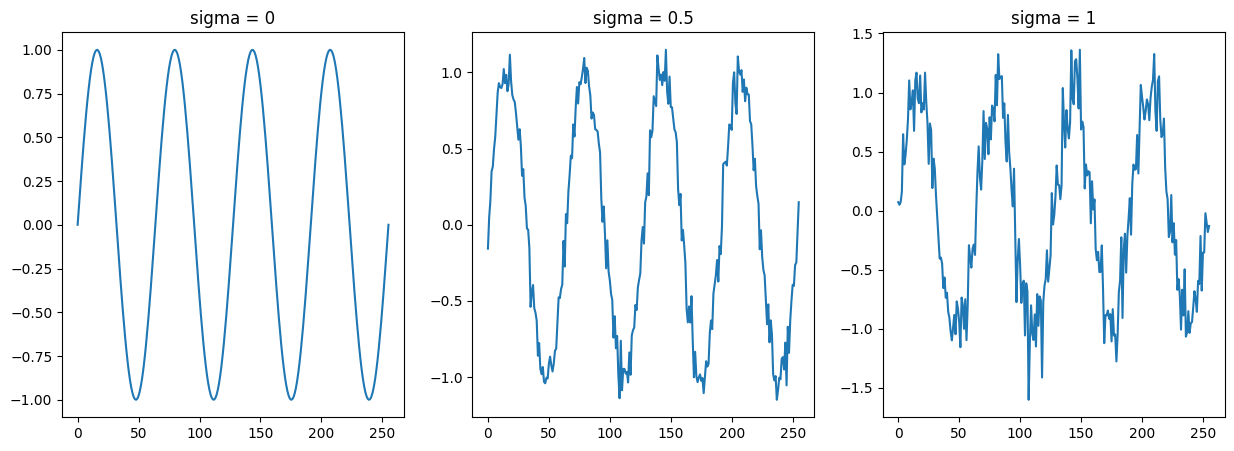

In [ ]:
# Sine Noisy Signals

plt.figure(figsize = (15,5))

for i,signal in enumerate(sine_noisy_signals):
    plt.subplot(1,3,i+1)
    plt.plot(signal)
    plt.title(f'sigma = {sigma_values[i]}')

### **TVF Denoising**

In [ ]:
def D_lambda(s, l, n_epochs):

    n = len(s)

    s = s.copy().T

    H = scipy.linalg.circulant(np.concatenate(([-1,1],np.zeros(n-2)))).T[:-1,:]

    # Step Size
    eig_val, eig_vector = eigs(np.matmul(H,H.T), k=1, which = 'LM')
    L = l**2 * np.abs(eig_val[0])

    # Gradient  Descent

    # Random Initialize
    y_old = np.random.uniform(low = -1, high = 1, size = len(s)-1)
    y_old = y_old.T

    for i in range(n_epochs):

        # Gradient equation
        grad_psi = l * np.matmul(H,s.copy()) - l**2 * np.matmul(np.matmul(H,H.T),y_old)

        y_new = y_old + (1/L) * grad_psi                                        # Updating y

        y_new = y_new / np.max(np.abs(y_new))                                   # Projecting y to unit hypercube

        y_old = y_new.copy()

    z = s - l*np.matmul(H.T,y_new)                                              # Optimal Value of z

    return z

Text(0.5, 0.98, 'MSE for Different levels of noise')

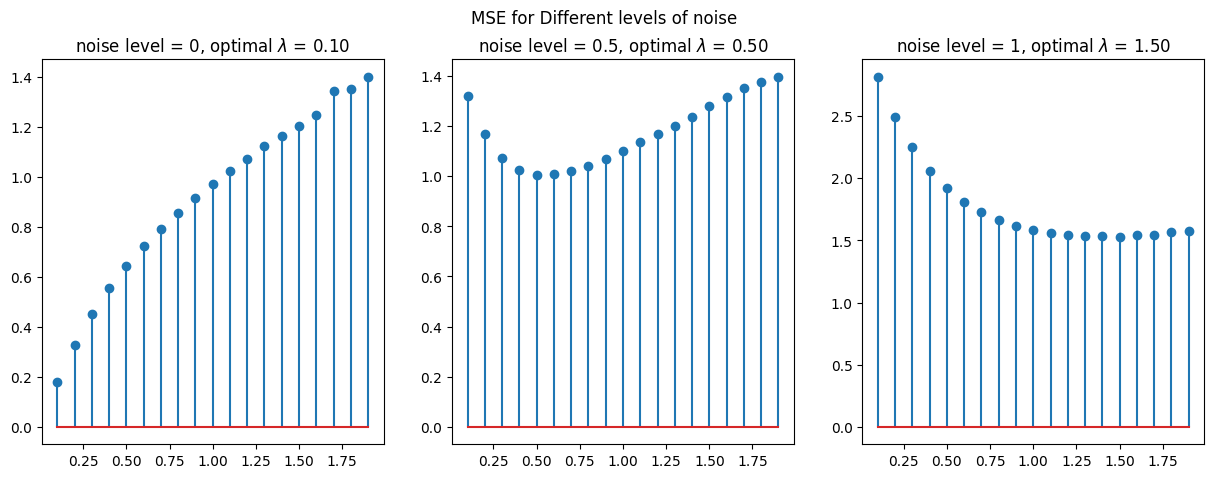

In [ ]:
plt.figure(figsize = (15,5))

lambda_values = np.arange(0.1,2,0.1)

for i,noisy_signal in enumerate(piecewise_constant_noisy_signals):

    mse_list = []

    for lambda_ in lambda_values:
        z_optimal = D_lambda(noisy_signal, l = lambda_, n_epochs = 100)

        MSE = norm(piecewise_constant_signal.copy()-z_optimal)
        mse_list.append(MSE)

    plt.subplot(1,3,i+1)
    plt.stem(lambda_values,mse_list)
    plt.title(f'noise level = {sigma_values[i]}, optimal $\lambda$ = {lambda_values[np.argmin(mse_list)]:.2f}')
plt.suptitle('MSE for Different levels of noise')

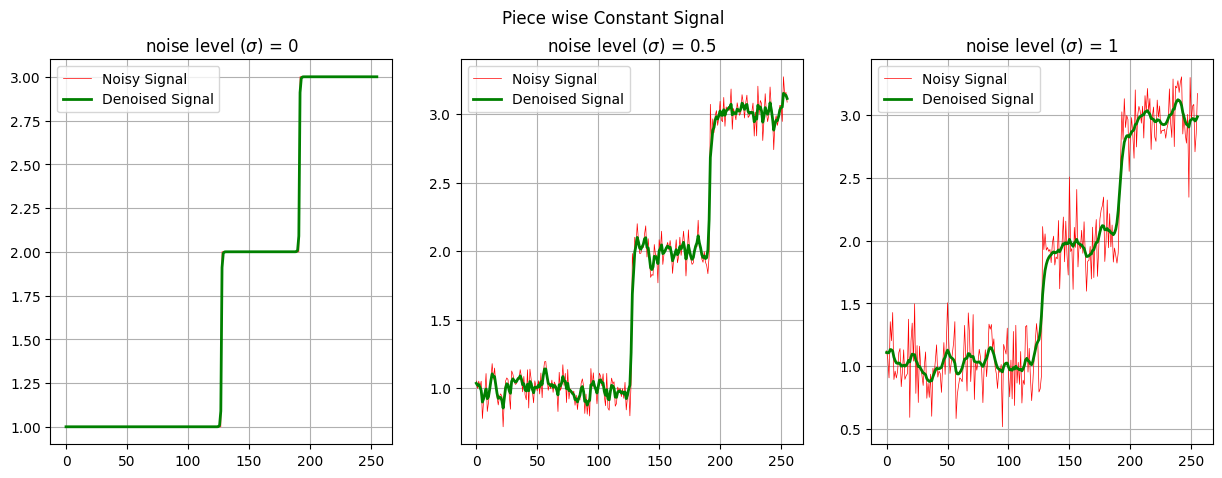

In [ ]:
plt.figure(figsize = (15,5))
plt.suptitle('Piece wise Constant Signal')
optimal_lambdas = [0.1,0.5,1.5]
for i,noisy_signal in enumerate(piecewise_constant_noisy_signals):
    z_optimal = D_lambda(noisy_signal, l = optimal_lambdas[i], n_epochs = 100)
    plt.subplot(1,3,i+1)
    plt.plot(noisy_signal, 'r', linewidth = 0.5, label = 'Noisy Signal')
    plt.plot(z_optimal, 'g', linewidth = 2, label = 'Denoised Signal')
    plt.title(f'noise level ($\sigma$) = {sigma_values[i]}')
    plt.grid()
    plt.legend()

Text(0.5, 0.98, 'MSE for Different levels of noise')

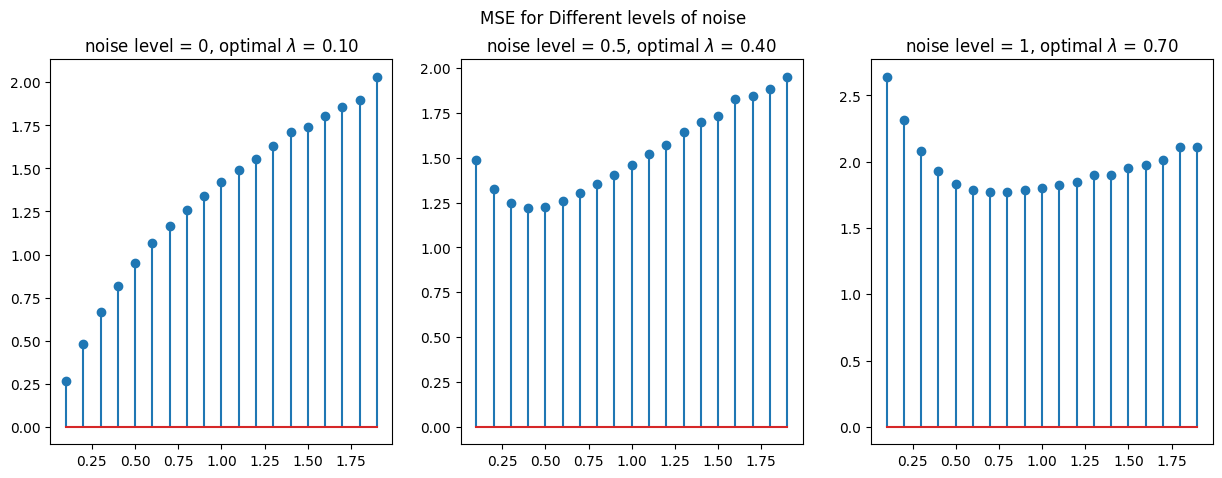

In [ ]:
plt.figure(figsize = (15,5))

lambda_values = np.arange(0.1,2,0.1)

for i,noisy_signal in enumerate(sawtooth_noisy_signals):

    mse_list = []

    for lambda_ in lambda_values:
        z_optimal = D_lambda(noisy_signal, l = lambda_, n_epochs = 100)

        MSE = norm(sawtooth_signal.copy()-z_optimal)
        mse_list.append(MSE)

    plt.subplot(1,3,i+1)
    plt.stem(lambda_values,mse_list)
    plt.title(f'noise level = {sigma_values[i]}, optimal $\lambda$ = {lambda_values[np.argmin(mse_list)]:.2f}')
plt.suptitle('MSE for Different levels of noise')

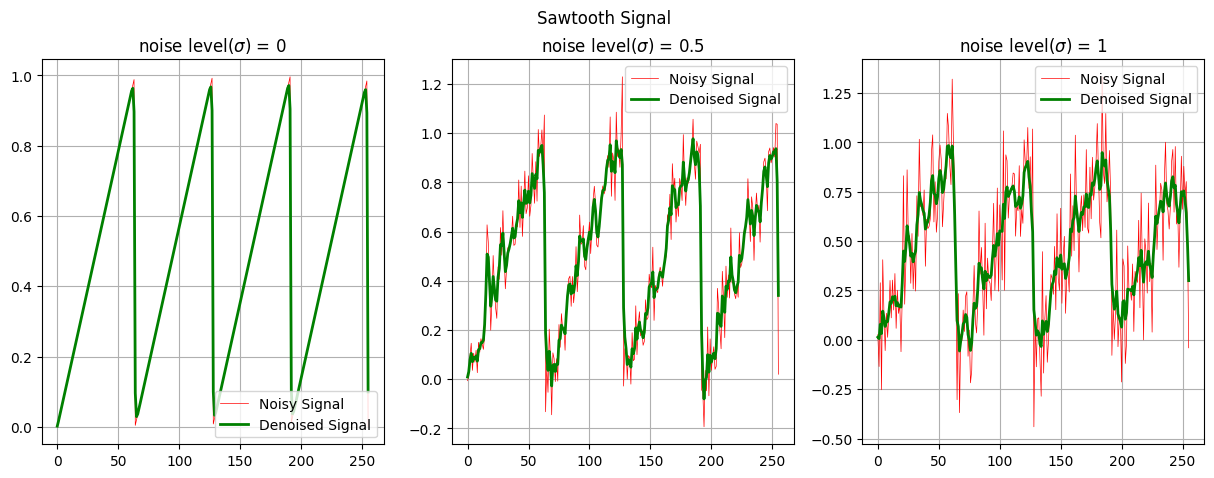

In [ ]:
plt.figure(figsize = (15,5))

plt.suptitle('Sawtooth Signal')

optimal_lambdas = [0.1,0.4,0.7]

for i,noisy_signal in enumerate(sawtooth_noisy_signals):
    z_optimal = D_lambda(noisy_signal, l = optimal_lambdas[i], n_epochs = 100)
    plt.subplot(1,3,i+1)
    plt.plot(noisy_signal, 'r', linewidth = 0.5, label = 'Noisy Signal')
    plt.plot(z_optimal, 'g', linewidth = 2, label = 'Denoised Signal')
    plt.title(f'noise level($\sigma$) = {sigma_values[i]}')
    plt.grid()
    plt.legend()

Text(0.5, 0.98, 'MSE for Different levels of noise')

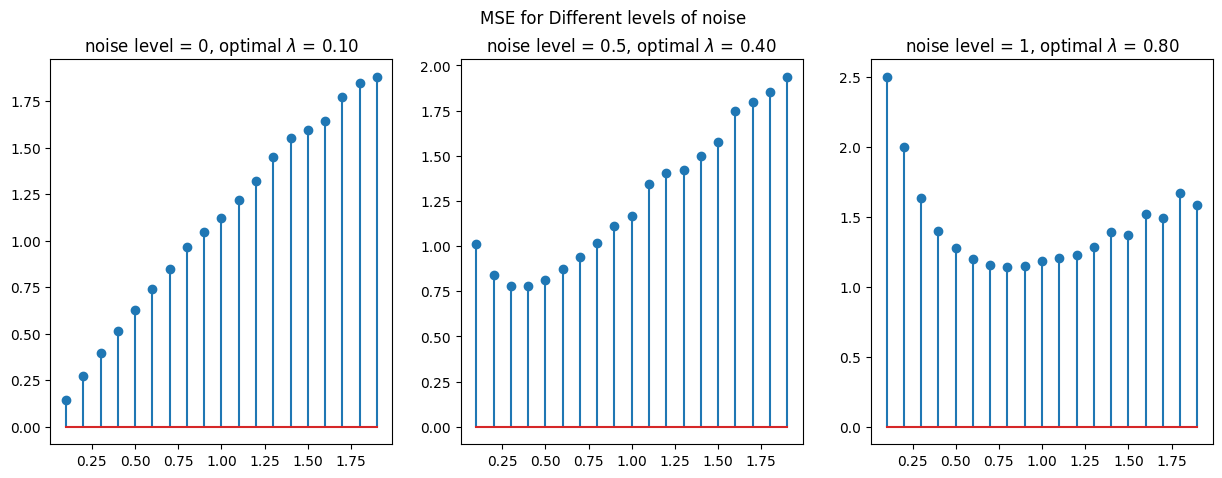

In [ ]:
plt.figure(figsize = (15,5))

lambda_values = np.arange(0.1,2,0.1)

for i,noisy_signal in enumerate(sine_noisy_signals):

    mse_list = []

    for lambda_ in lambda_values:
        z_optimal = D_lambda(noisy_signal, l = lambda_, n_epochs = 100)

        MSE = norm(sine_signal.copy()-z_optimal)
        mse_list.append(MSE)

    plt.subplot(1,3,i+1)
    plt.stem(lambda_values,mse_list)
    plt.title(f'noise level = {sigma_values[i]}, optimal $\lambda$ = {lambda_values[np.argmin(mse_list)]:.2f}')
plt.suptitle('MSE for Different levels of noise')

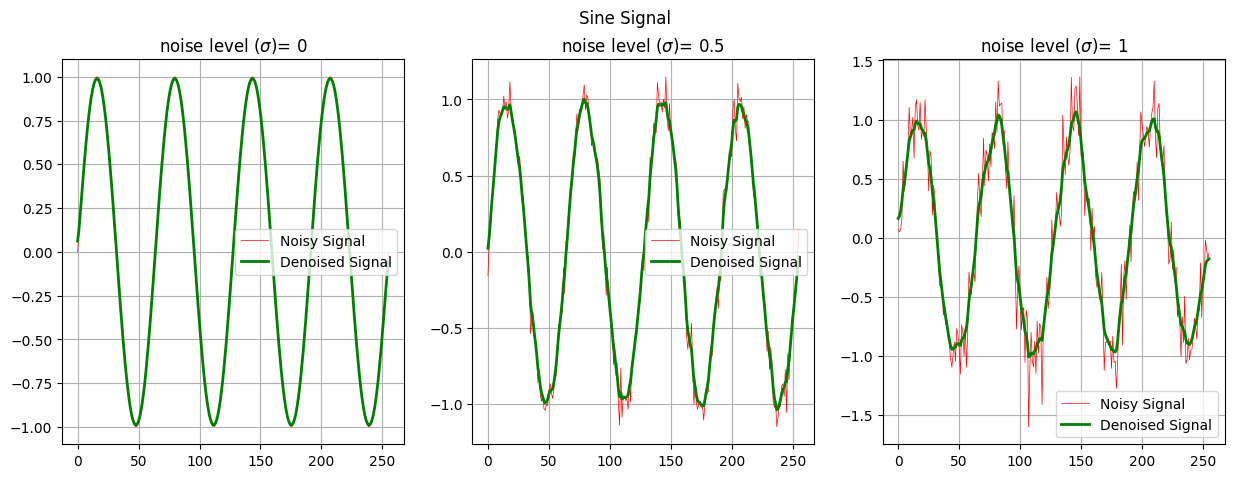

In [ ]:
plt.figure(figsize = (15,5))

plt.suptitle('Sine Signal')

optimal_lambdas = [0.1, 0.4, 0.8]

for i,noisy_signal in enumerate(sine_noisy_signals):
    z_optimal = D_lambda(noisy_signal, l = optimal_lambdas[i], n_epochs = 100)
    plt.subplot(1,3,i+1)
    plt.plot(noisy_signal, 'r', linewidth = 0.5, label = 'Noisy Signal')
    plt.plot(z_optimal, 'g', linewidth = 2, label = 'Denoised Signal')
    plt.title(f'noise level ($\sigma$)= {sigma_values[i]}')
    plt.grid()
    plt.legend()

### **Compressed Sensing**

In [ ]:
def generate_compressed_noisy_signals(signal):

    std_dev = 0.2

    n = len(signal)
    m_values = [0.5*n, 0.75*n, n]
    sigma_values = [0, 0.5, 1]
    compressed_noisy_signal_list = []
    final_A_list = []

    for sigma in sigma_values:
        compressed_signal_list = []
        A_list = []
        for m in m_values:
            A = np.random.randn(int(m),n)
            noise = np.random.normal(loc = 0, scale = std_dev, size = int(m))
            compressed_noisy_signal = np.matmul(A,signal.copy().T) + sigma * noise.T

            compressed_signal_list.append(compressed_noisy_signal)
            A_list.append(A)

        final_A_list.append(A_list)
        compressed_noisy_signal_list.append(compressed_signal_list)

    return compressed_noisy_signal_list, final_A_list

In [ ]:
compressed_piecewise_constant_signals, A_compressed_piecewise_constant = generate_compressed_noisy_signals(piecewise_constant_signal)
compressed_sawtooth_signals, A_compressed_sawtooth = generate_compressed_noisy_signals(sawtooth_signal)
compressed_sine_signals, A_compressed_sine = generate_compressed_noisy_signals(sine_signal)

Text(0.5, 0.98, 'Piecewise Constant Signal')

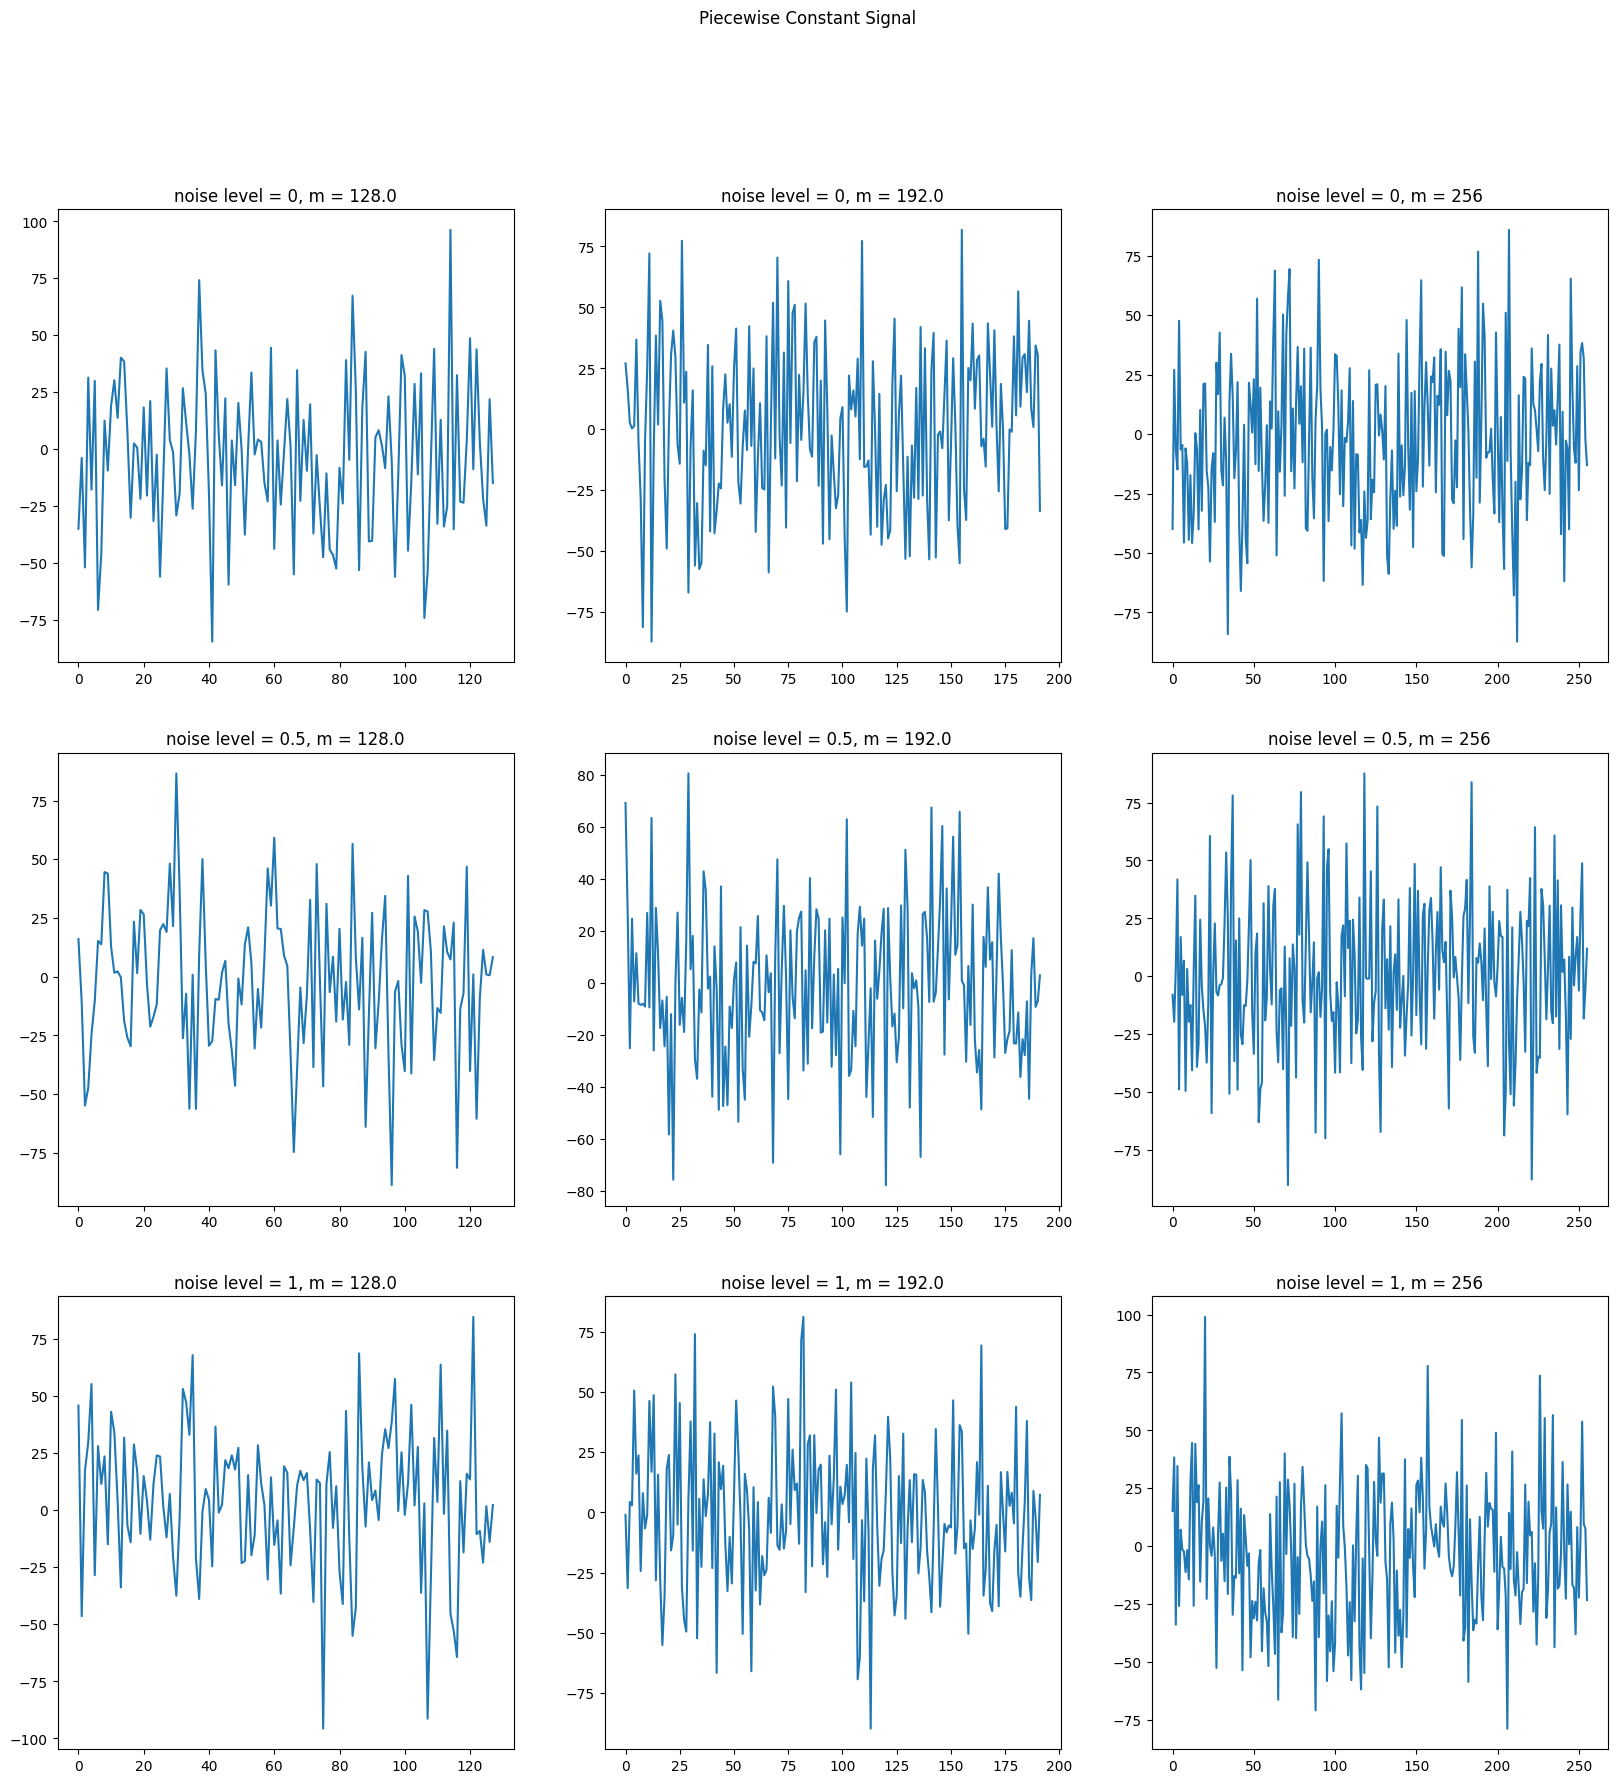

In [ ]:
plt.figure(figsize = (20,20))

sigma_values = [0, 0.5, 1]
m_values = [0.5*256, 0.75*256, 256]

k=1
for i in range(len(compressed_piecewise_constant_signals)):
    for j in range(len(compressed_piecewise_constant_signals[0])):

        plt.subplot(3,3,k)
        plt.plot(compressed_piecewise_constant_signals[i][j])
        plt.title(f'noise level = {sigma_values[i]}, m = {m_values[j]}')
        k+=1
plt.suptitle('Piecewise Constant Signal')

Text(0.5, 0.98, 'Sawtooth Signal')

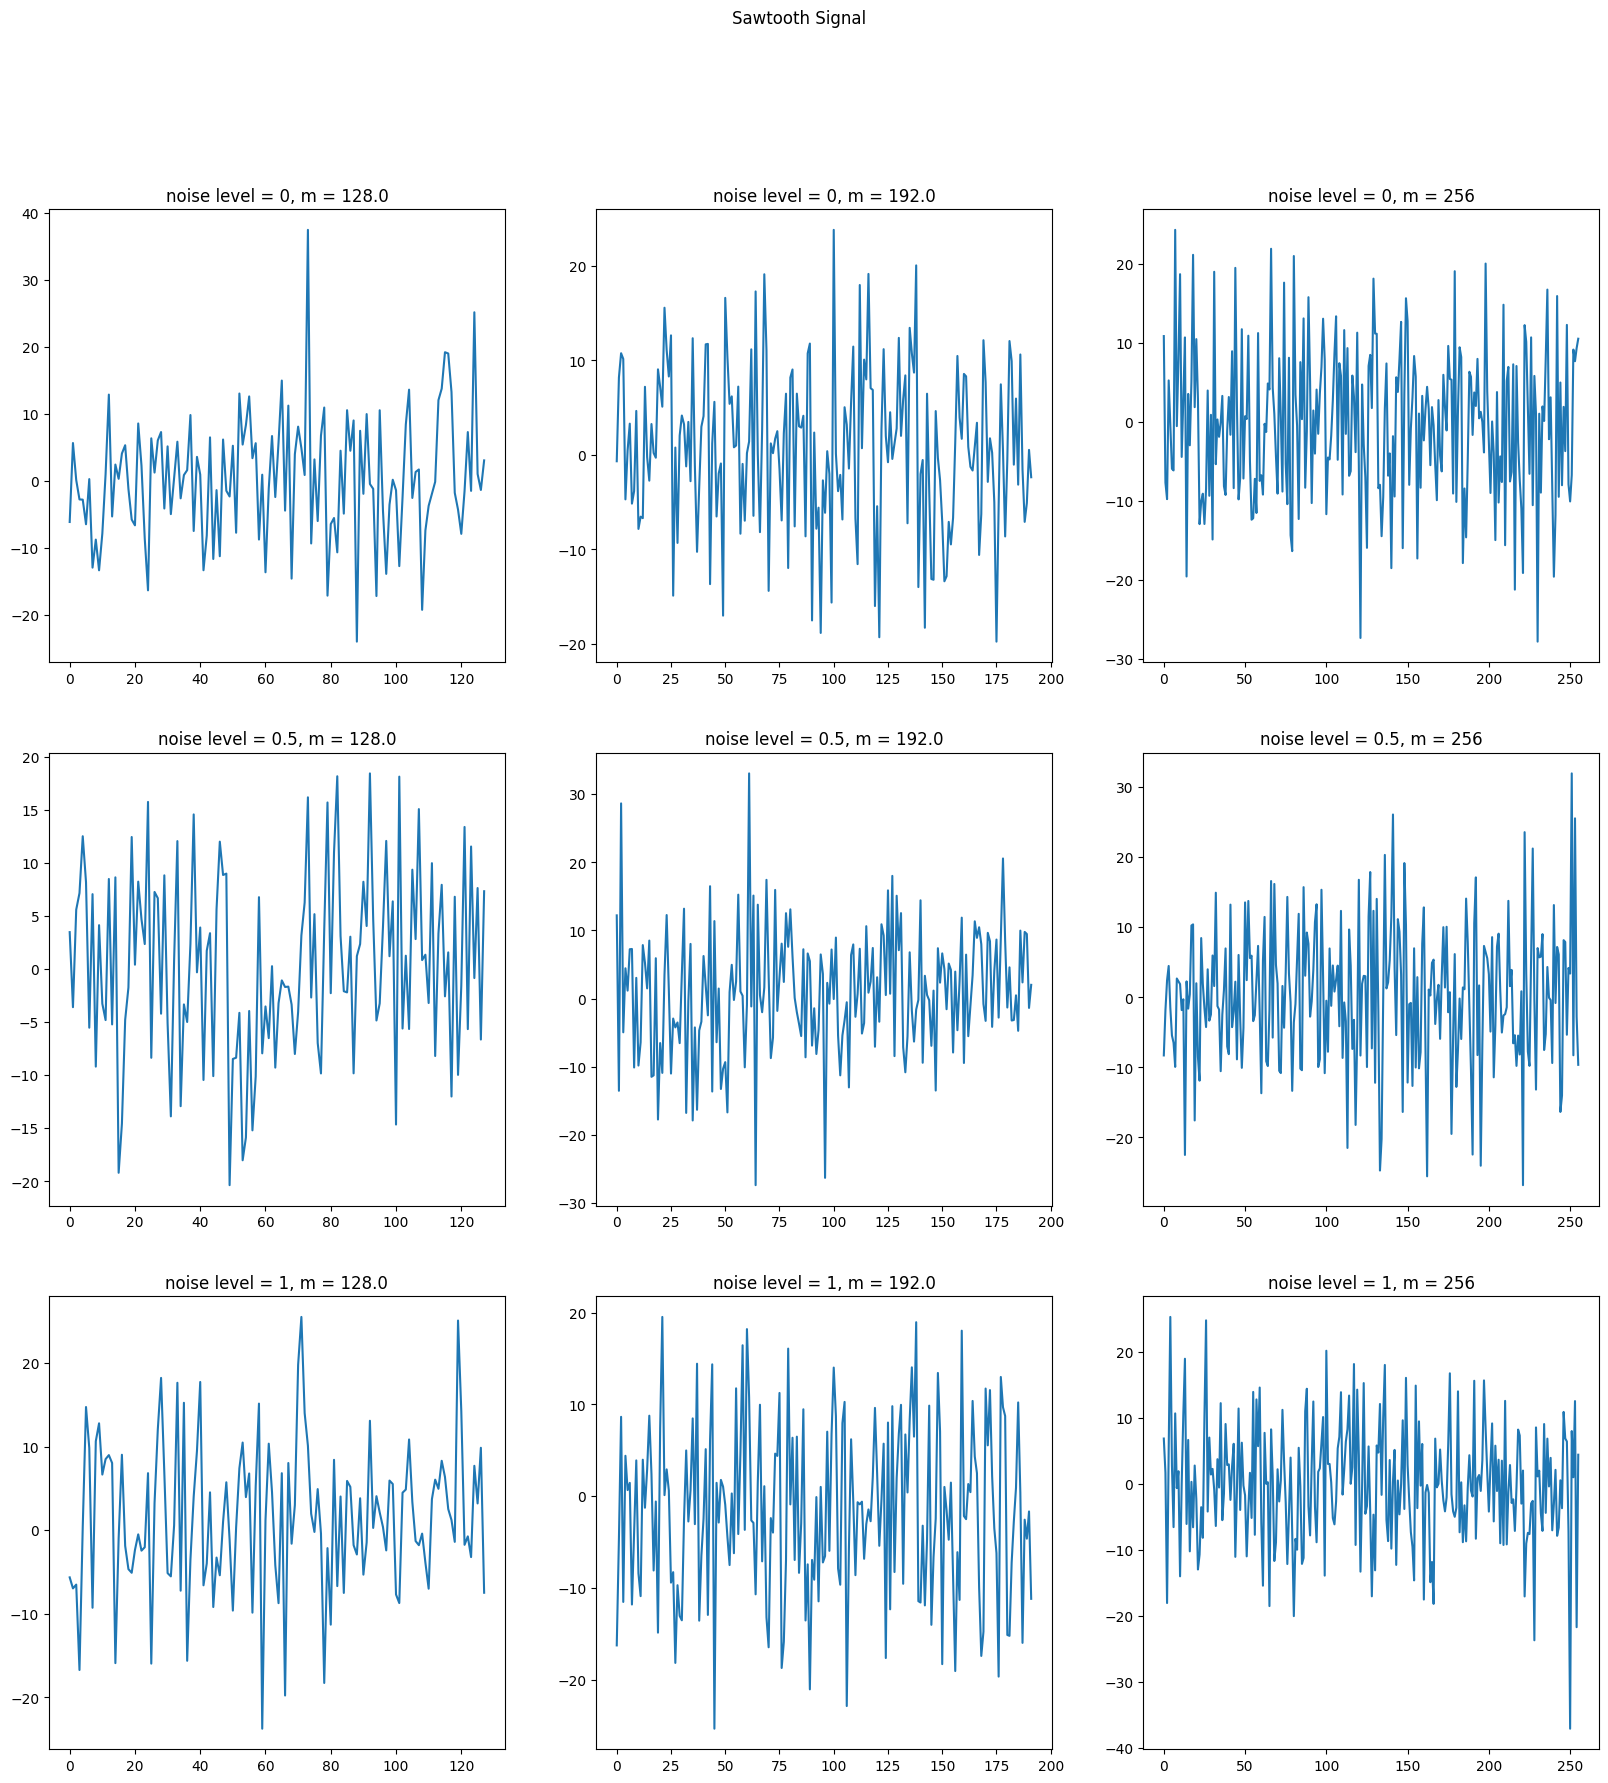

In [ ]:
plt.figure(figsize = (20,20))

sigma_values = [0, 0.5, 1]
m_values = [0.5*256, 0.75*256, 256]

k=1
for i in range(len(compressed_sawtooth_signals)):
    for j in range(len(compressed_sawtooth_signals[0])):

        plt.subplot(3,3,k)
        plt.plot(compressed_sawtooth_signals[i][j])
        plt.title(f'noise level = {sigma_values[i]}, m = {m_values[j]}')
        k+=1
plt.suptitle('Sawtooth Signal')

Text(0.5, 0.98, 'Sine Signal')

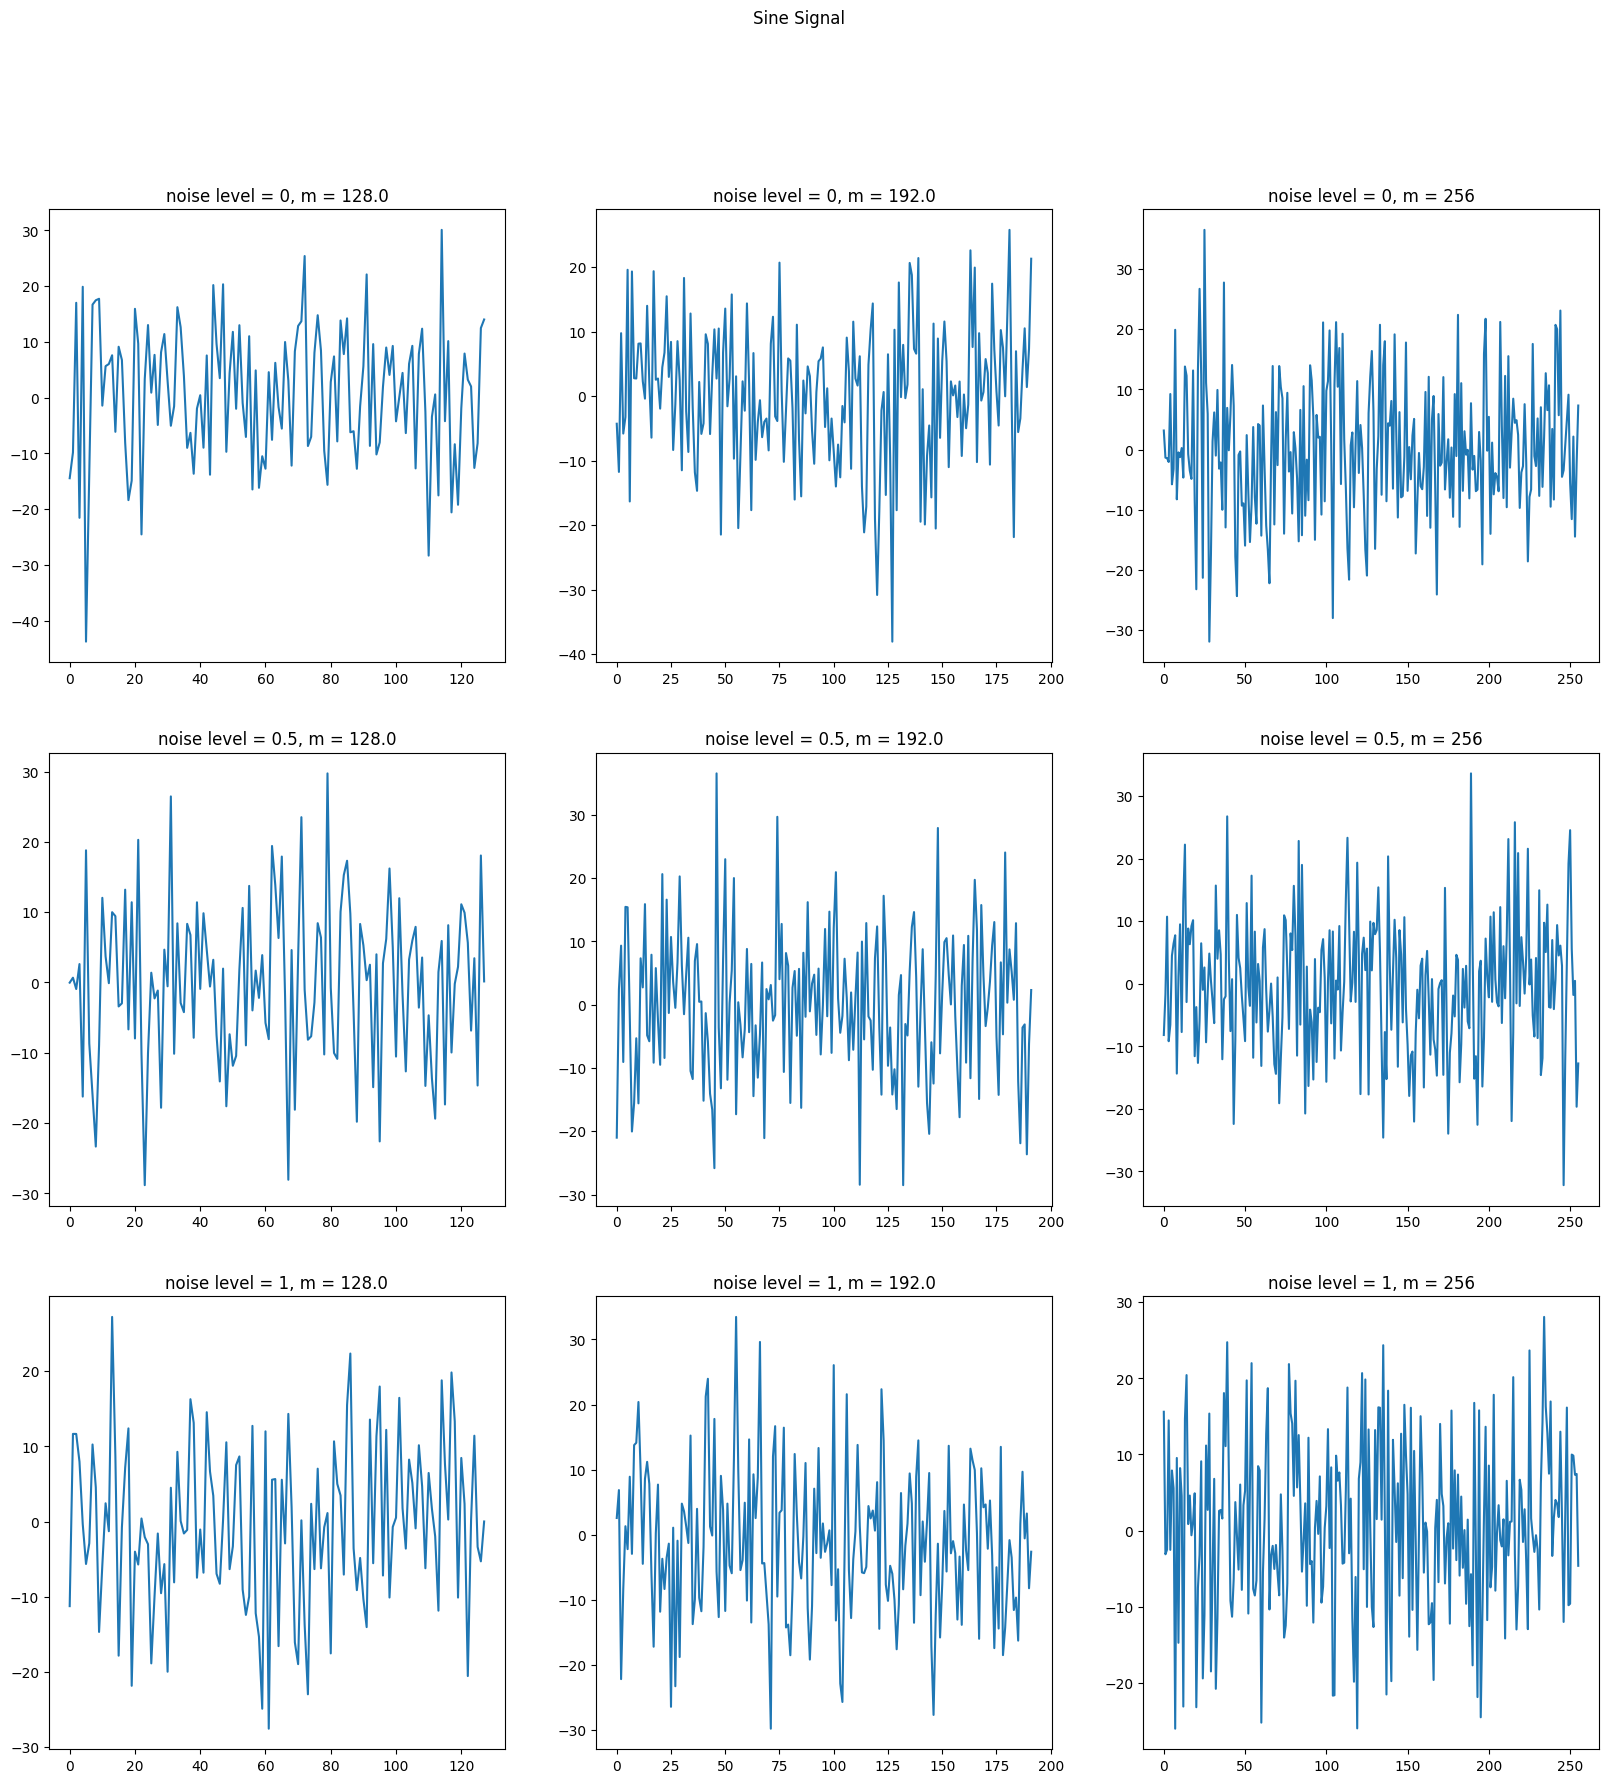

In [ ]:
plt.figure(figsize = (20,20))

sigma_values = [0, 0.5, 1]
m_values = [0.5*256, 0.75*256, 256]

k=1
for i in range(len(compressed_sine_signals)):
    for j in range(len(compressed_sine_signals[0])):

        plt.subplot(3,3,k)
        plt.plot(compressed_sine_signals[i][j])
        plt.title(f'noise level = {sigma_values[i]}, m = {m_values[j]}')
        k+=1
plt.suptitle('Sine Signal')

In [ ]:
def R_lambda(s, l, A, epochs):

    n = len(s)

    s = s.copy().T

    # Step Size
    eig_val, eig_vector = eigs(np.matmul(A,A.T), k=1, which = 'LM')

    L = l**2 * np.abs(eig_val[0])

    # Gradient  Descent

    # Random Initialize
    z_old = np.random.randn(A.shape[1])
    z_old = z_old.T

    for i in range(epochs):

        # Gradient equation
        grad_f = - np.matmul(A.T,(s - np.matmul(A,z_old)))

        z_new = D_lambda(z_old - (1/L) * grad_f,l, n_epochs=100)

        z_old = z_new.copy()

    return z_new

In [ ]:
def find_optimal_lambda(original_signal, compressed_signal,A):

    sigma_values = [0, 0.5, 1]
    m_values = [0.5*256, 0.75*256, 256]

    lambda_values = np.arange(0.6,0.8,0.05)

    mse_list = []
    for lambda_ in lambda_values:
        reconstructed_signal = R_lambda(s = compressed_signal, l=lambda_,  A=A, epochs = 100)
        mse_list.append(norm(original_signal - reconstructed_signal))

    return lambda_values[np.argmin(mse_list)]

In [ ]:
print('Piece-wise Constant Signal')

sigma_values = [0, 0.5, 1]
m_values = [0.5*256, 0.75*256, 256]

for i in range(3):
    for j in range(3):

        compressed_signal = compressed_piecewise_constant_signals [i][j]
        A = A_compressed_piecewise_constant[i][j]

        optimal_lambda = find_optimal_lambda(piecewise_constant_signal, compressed_signal, A)

        print(f'noise level = {sigma_values[i]}, m = {m_values[j]}, optimal lambda = {optimal_lambda}')


Piece-wise Constant Signal
noise level = 0, m = 128.0, optimal lambda = 0.65
noise level = 0, m = 192.0, optimal lambda = 0.65
noise level = 0, m = 256, optimal lambda = 0.65
noise level = 0.5, m = 128.0, optimal lambda = 0.65
noise level = 0.5, m = 192.0, optimal lambda = 0.65
noise level = 0.5, m = 256, optimal lambda = 0.65
noise level = 1, m = 128.0, optimal lambda = 0.65
noise level = 1, m = 192.0, optimal lambda = 0.65
noise level = 1, m = 256, optimal lambda = 0.65


In [ ]:
piecewise_reconstructed_signals = []

optimal_lambdas = [ [0.65, 0.65, 0.65 ],[0.65, 0.65,0.65],[0.65,0.65,0.65]]

for i in range(3):
    temp_list = []
    for j in range(3):
        compressed_signal = compressed_piecewise_constant_signals [i][j]
        A = A_compressed_piecewise_constant[i][j]
        temp_list.append(R_lambda(s = compressed_signal, l=optimal_lambdas[i][j],  A=A, epochs = 1000))
    piecewise_reconstructed_signals.append(temp_list)

Text(0.5, 0.98, 'Piecewise Constant Signal')

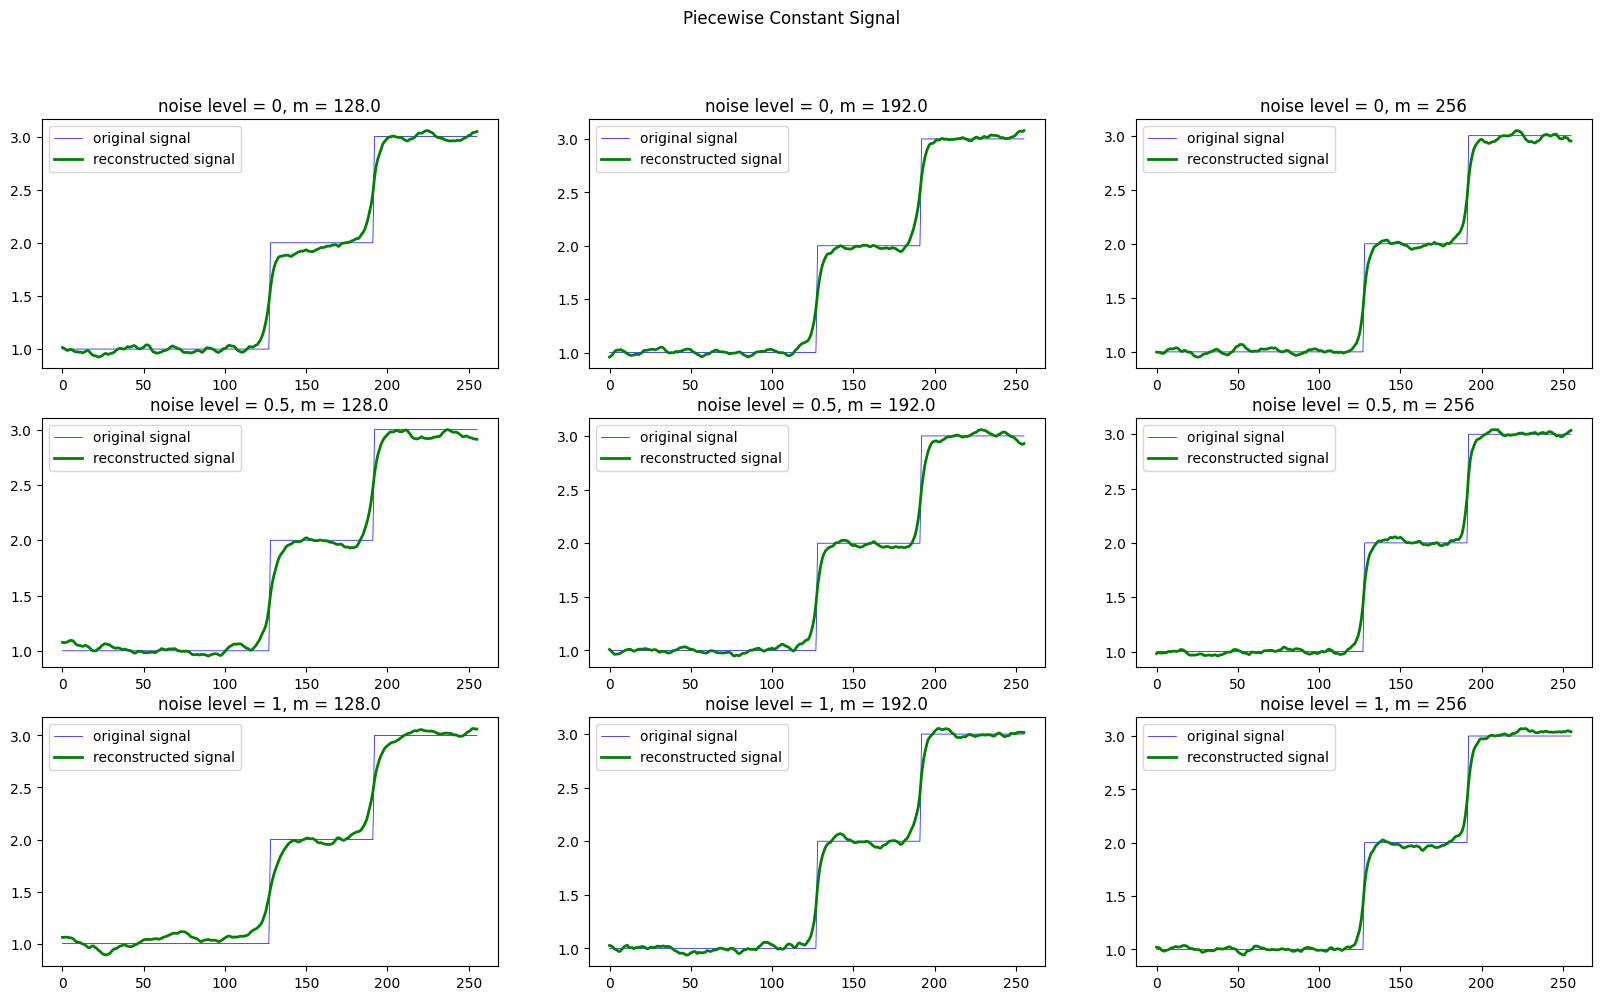

In [ ]:
plt.figure(figsize = (20,11))

sigma_values = [0, 0.5, 1]
m_values = [0.5*256, 0.75*256, 256]

k=1
for i in range(len(compressed_sine_signals)):
    for j in range(len(compressed_sine_signals[0])):
        plt.subplot(3,3,k)
        plt.plot(piecewise_constant_signal, 'b', linewidth = 0.5, label = 'original signal')
        plt.plot(piecewise_reconstructed_signals[i][j], 'g',linewidth = 2, label = 'reconstructed signal')
        plt.title(f'noise level = {sigma_values[i]}, m = {m_values[j]}')
        plt.legend()
        k+=1
plt.suptitle('Piecewise Constant Signal')

In [ ]:
print('Sawtooth Signal')

sigma_values = [0, 0.5, 1]
m_values = [0.5*256, 0.75*256, 256]

for i in range(3):
    for j in range(3):

        compressed_signal = compressed_sawtooth_signals [i][j]
        A = A_compressed_sawtooth[i][j]

        optimal_lambda = find_optimal_lambda(sawtooth_signal, compressed_signal, A)

        print(f'noise level = {sigma_values[i]}, m = {m_values[j]}, optimal lambda = {optimal_lambda:.4f}')


Sawtooth Signal
noise level = 0, m = 128.0, optimal lambda = 0.6000
noise level = 0, m = 192.0, optimal lambda = 0.6000
noise level = 0, m = 256, optimal lambda = 0.6000
noise level = 0.5, m = 128.0, optimal lambda = 0.6000
noise level = 0.5, m = 192.0, optimal lambda = 0.6000
noise level = 0.5, m = 256, optimal lambda = 0.6000
noise level = 1, m = 128.0, optimal lambda = 0.6000
noise level = 1, m = 192.0, optimal lambda = 0.6000
noise level = 1, m = 256, optimal lambda = 0.6000


In [ ]:
sawtooth_reconstructed_signals = []

optimal_lambdas = [ [0.6, 0.6, 0.6 ],[0.6, 0.6,0.6],[0.6,0.6,0.65]]

for i in range(3):
    temp_list = []
    for j in range(3):
        compressed_signal = compressed_sawtooth_signals [i][j]
        A = A_compressed_sawtooth[i][j]
        temp_list.append(R_lambda(s = compressed_signal, l=optimal_lambdas[i][j],  A=A, epochs = 100))
    sawtooth_reconstructed_signals.append(temp_list)

Text(0.5, 0.98, 'Sawtooth Signal')

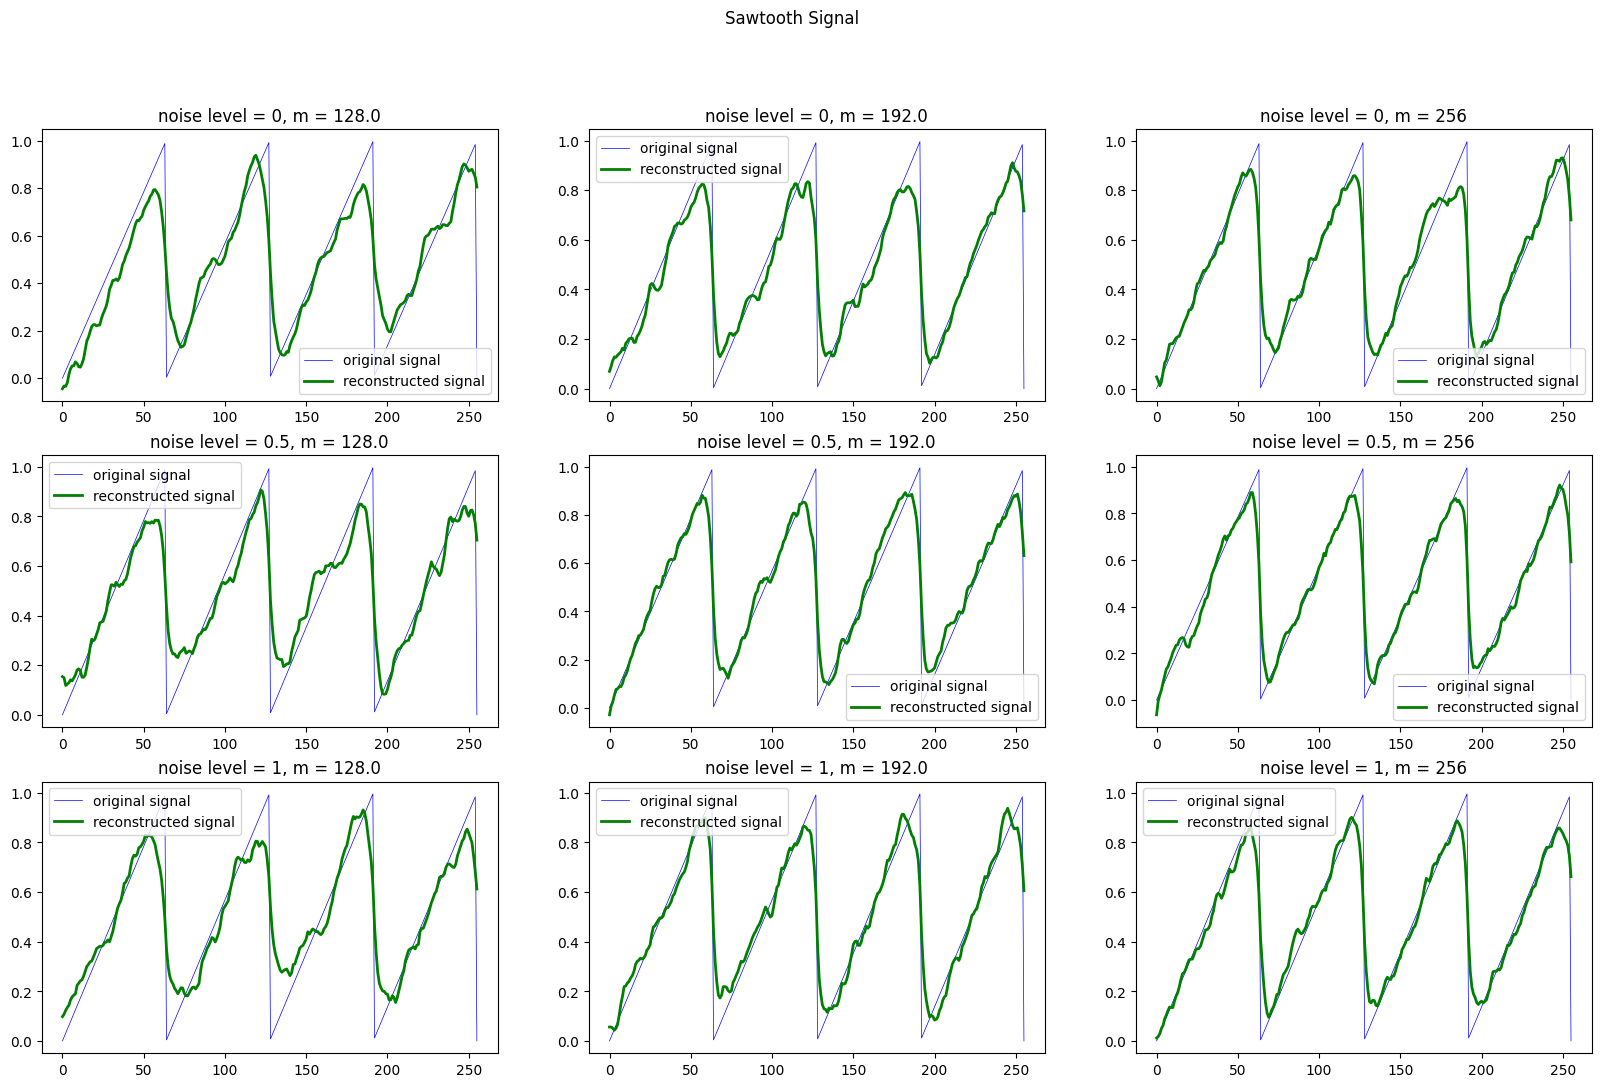

In [ ]:
plt.figure(figsize = (20,12))

sigma_values = [0, 0.5, 1]
m_values = [0.5*256, 0.75*256, 256]

k=1
for i in range(len(compressed_sawtooth_signals)):
    for j in range(len(compressed_sawtooth_signals[0])):
        plt.subplot(3,3,k)
        plt.plot(sawtooth_signal, 'b', linewidth = 0.5, label = 'original signal')
        plt.plot(sawtooth_reconstructed_signals[i][j], 'g',linewidth = 2, label = 'reconstructed signal')
        plt.title(f'noise level = {sigma_values[i]}, m = {m_values[j]}')
        plt.legend()
        k+=1
plt.suptitle('Sawtooth Signal')

In [ ]:
print('Sine Signal')

sigma_values = [0, 0.5, 1]
m_values = [0.5*256, 0.75*256, 256]

for i in range(3):
    for j in range(3):

        compressed_signal = compressed_sine_signals [i][j]
        A = A_compressed_sine[i][j]

        optimal_lambda = find_optimal_lambda(sine_signal, compressed_signal, A)

        print(f'noise level = {sigma_values[i]}, m = {m_values[j]}, optimal lambda = {optimal_lambda}')

Sine Signal
noise level = 0, m = 128.0, optimal lambda = 0.6
noise level = 0, m = 192.0, optimal lambda = 0.6
noise level = 0, m = 256, optimal lambda = 0.6
noise level = 0.5, m = 128.0, optimal lambda = 0.6
noise level = 0.5, m = 192.0, optimal lambda = 0.6
noise level = 0.5, m = 256, optimal lambda = 0.6
noise level = 1, m = 128.0, optimal lambda = 0.6
noise level = 1, m = 192.0, optimal lambda = 0.6
noise level = 1, m = 256, optimal lambda = 0.6


In [ ]:
sine_reconstructed_signals = []

optimal_lambdas = [[0.6, 0.6, 0.6],[0.6, 0.6,0.65],[0.6,0.6,0.65]]

for i in range(3):
    temp_list = []
    for j in range(3):
        compressed_signal = compressed_sine_signals [i][j]
        A = A_compressed_sine[i][j]
        temp_list.append(R_lambda(s = compressed_signal, l=optimal_lambdas[i][j],  A=A, epochs = 100))
    sine_reconstructed_signals.append(temp_list)

Text(0.5, 0.98, 'Sine Signal')

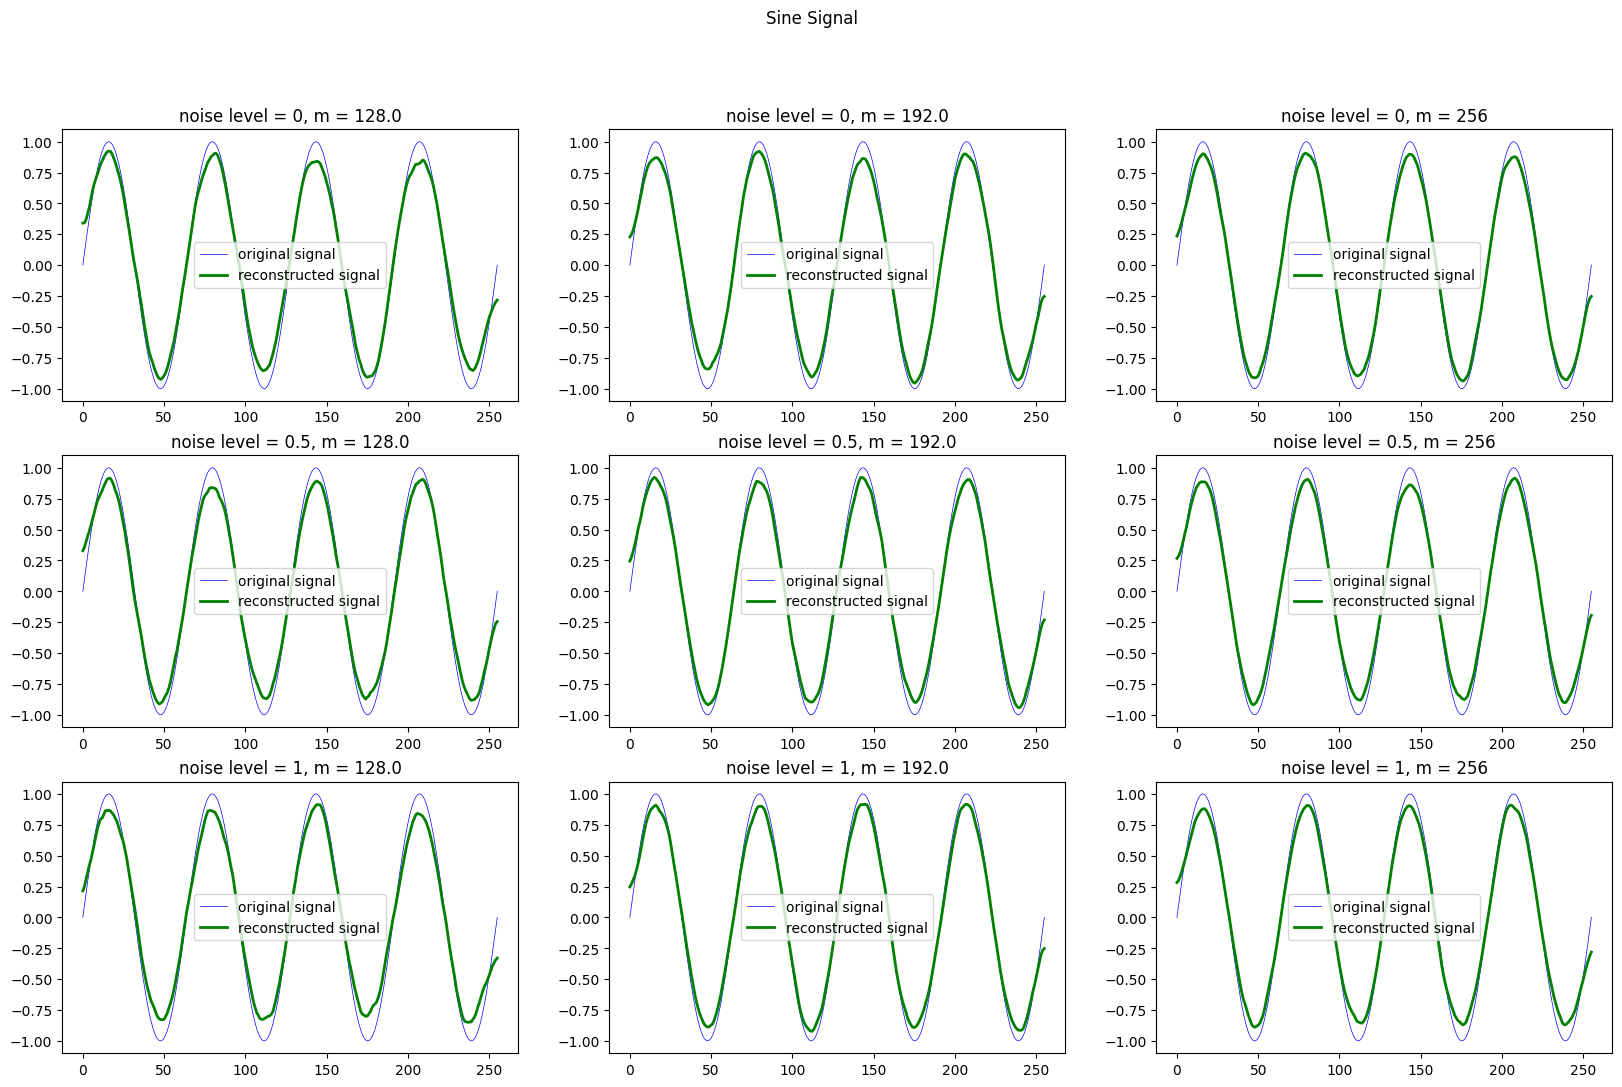

In [ ]:
plt.figure(figsize = (20,12))

sigma_values = [0, 0.5, 1]
m_values = [0.5*256, 0.75*256, 256]

k=1
for i in range(len(compressed_sine_signals)):
    for j in range(len(compressed_sine_signals[0])):
        plt.subplot(3,3,k)
        plt.plot(sine_signal, 'b', linewidth = 0.5, label = 'original signal')
        plt.plot(sine_reconstructed_signals[i][j], 'g',linewidth = 2, label = 'reconstructed signal')
        plt.title(f'noise level = {sigma_values[i]}, m = {m_values[j]}')
        plt.legend()
        k+=1
plt.suptitle('Sine Signal')

In [ ]:
sigma_values = [0, 0.5, 1]
m_values = [0.5*256, 0.75*256, 256]

i,j=2,0
compressed_signal = compressed_sine_signals [i][j]
A = A_compressed_sine[i][j]

optimal_lambda = find_optimal_lambda(sine_signal, compressed_signal, A)

print(f'Optimal_lambda = {optimal_lambda}')

reconstructed_signal = R_lambda(s = compressed_signal, l=optimal_lambda,  A=A, epochs = 100)

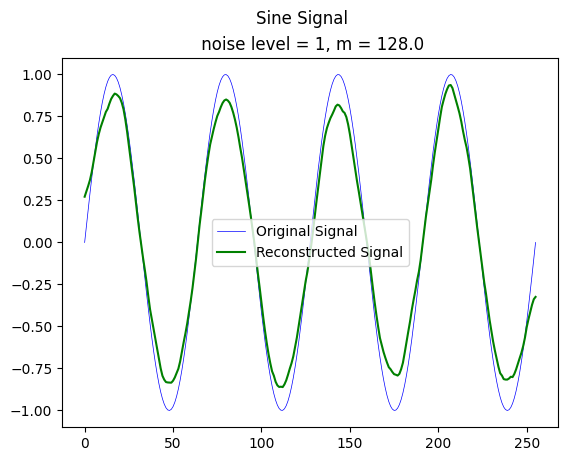

In [ ]:
plt.plot(sine_signal, 'b', linewidth = 0.5, label = 'Original Signal')
plt.plot(reconstructed_signal, 'g', label = 'Reconstructed Signal')
plt.title(f' noise level = {sigma_values[i]}, m = {m_values[j]}')
plt.suptitle('Sine Signal')
plt.legend()

Optimal value of $\lambda$ has been found on a very small set of possible lambda values. Further fine tuning for optimal $\lambda$ is done later and is  given in the report. In the above images the optimal $\lambda$ found in the sets ave been used for signal reconstruction